In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def viewheatmap(fecha = '2021-01-02', colum = 'Temperatura media (ºC)', incendios = False):
    df = pd.read_csv(f'./ClimaDataSmall/Aemet{fecha}.csv')
    columnIndex = df.columns.get_loc(colum)
    df = df.iloc[:,[-1,-2,columnIndex]]
    df = df.query('Latitude > 30 and Latitude < 44 and Longitude > -20')
    if colum == 'Velocidad máxima (km/h)':
        for _ in range(len(df)):
            df.iloc[_,2] = df.iloc[_,2][:df.iloc[_,2].find(' ')]
    a = []
    for _ in df.iloc[:, 2].values:
        a.append(float(_))

    miny, maxy = min(df['Longitude']), max(df['Latitude'])
    minx, maxx = min(df['Longitude']), max(df['Latitude'])
    grdi_x = np.linspace(minx, maxx, num=300, endpoint=False)
    grdi_y = np.linspace(miny, maxy, num=300, endpoint=False)
    yg, xg = np.meshgrid(grdi_y, grdi_x, indexing='ij')
    x_g = xg.ravel()
    y_g = yg.ravel()

    df2 = df.drop([colum], 1)
    df3 = df[colum]
    points = np.array(df2)
    values = np.array(df3)

    #Sow Heatmap

    grid_z0 = griddata(points, values, (x_g, y_g), method='linear')
    plt.subplot(111)
    plt.scatter(x_g, y_g, s=40, marker='s', c=grid_z0, cmap=plt.cm.hsv)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    cbar=plt.colorbar()
    cbar.set_label(colum)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1, wspace=0.2, hspace=0.2)
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')

    #Sow incendios

    aa = pd.read_csv("./modis_2021_Spain_incendios.csv")
    aa = aa.query('latitude > 30')
    aa = aa[(aa['acq_date'] == fecha)]
    y = aa["latitude"]
    x = aa["longitude"]
    plt.scatter(x, y, c='black', s=50, marker="X", linewidths=1, edgecolors='white')

    plt.show()



/tmp/ipykernel_23426/2238227368.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)


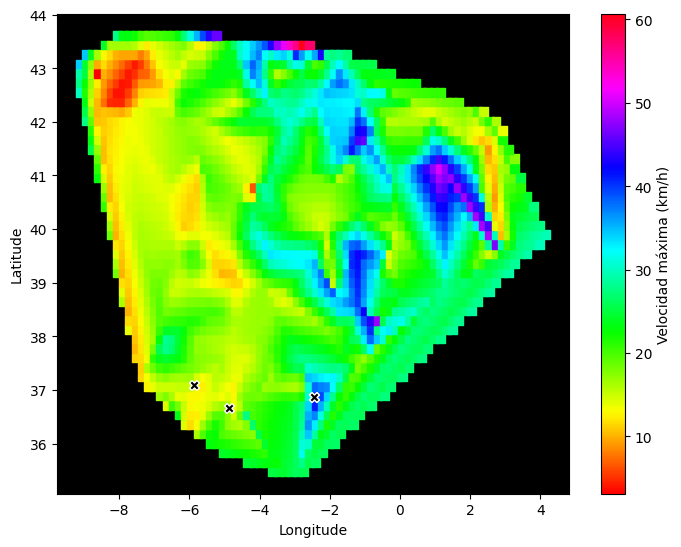

/tmp/ipykernel_23426/2238227368.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)


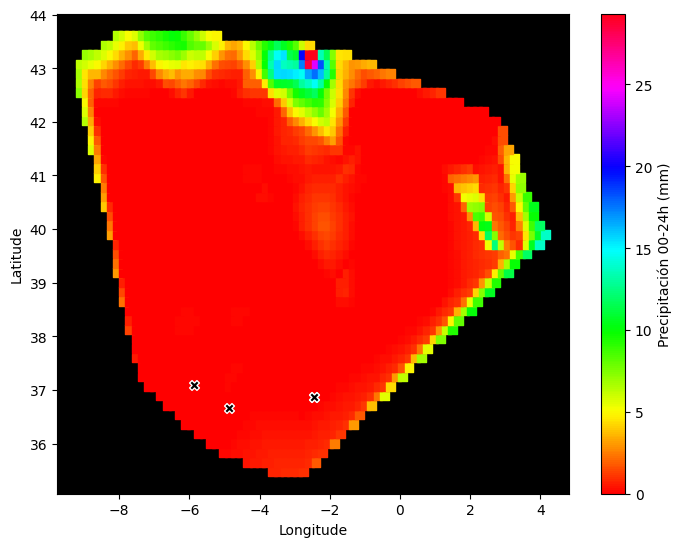

/tmp/ipykernel_23426/2238227368.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df.drop([colum], 1)


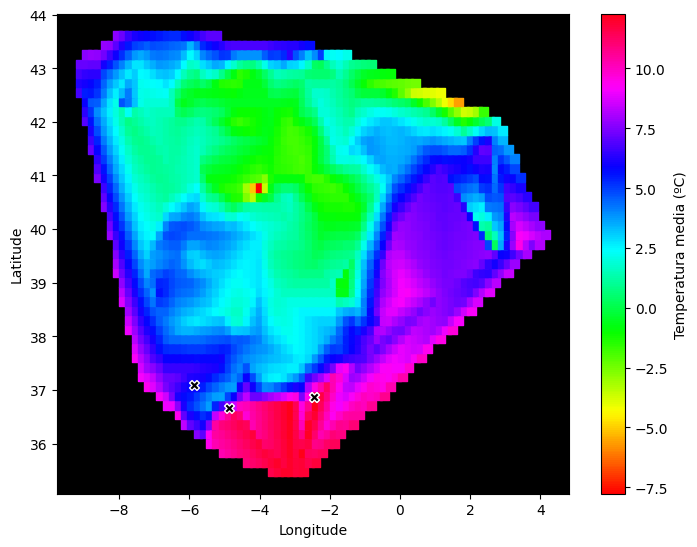

In [71]:
viewheatmap(colum = 'Velocidad máxima (km/h)',incendios=True)
viewheatmap(colum = 'Precipitación 00-24h (mm)',incendios=True)
viewheatmap(incendios=True)

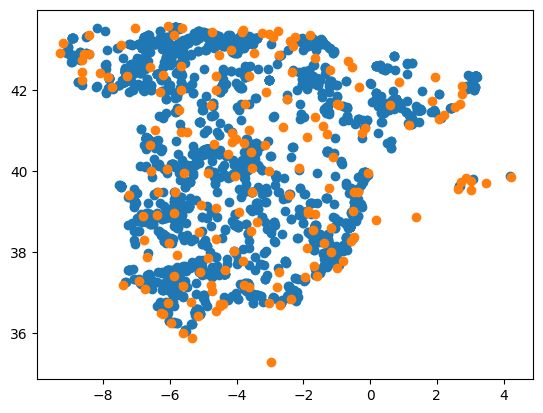

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
ee = pd.read_csv("./modis_2021_Spain_incendios.csv")
ee = ee.query('latitude > 30')
y2 = ee["latitude"]
x2 = ee["longitude"]
plt.scatter(x2, y2)

asdasdasd = pd.read_csv('./ClimaDataSmall/Aemet2021-01-02.csv')
asdasdasd = asdasdasd.iloc[1:,[-1,-2,4]]
asdasdasd = asdasdasd.query('Latitude > 30 and Latitude < 44 and Longitude > -20')
y = asdasdasd["Latitude"]
x = asdasdasd["Longitude"]
plt.scatter(x, y)
plt.show()